A colection of python tools for radio astronomy image analysis. <br>
By Geferson Lucatelli

Objectives:
1. Basic image manipulation and plotting.
2. Caracterize the radio emission of Local U/LIRGs.
3. Disentangle the radio sub-components on these structures, e.g. compact components, diffuse emission
4. Break down the total luminosity contribution coming from the diffuse radio emission in relation to the compact/AGN emission


Basically, this notebook contains:

    1. Image fitting implementations
    2. Image analysis (non-parametric)
    3. Plotting capabilities
    4. Signal processing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import casatasks
from casatasks import *
import casatools
import casaviewer
import casaplotms
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as pf
from matplotlib.gridspec import GridSpec
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
from casaviewer import imview as imview

def reset_rc_params():
    mpl.rcParams.update({'font.size': 16, 
                         "text.usetex": False,#         
                         "font.family": "sans-serif",
                         'mathtext.fontset': 'stix',
                         "font.family": "sans",
                         'font.weight': 'medium', #medium, semibold, light, 500
                         'font.family': 'STIXGeneral',
                         'xtick.labelsize':16,
                         'figure.figsize': (6,4),
                         'ytick.labelsize':16,
                         'axes.labelsize' : 16,
                         'xtick.major.width':1,
                         'ytick.major.width':1,
                         'axes.linewidth':1.5,
                         'axes.edgecolor':'black',
                         'lines.linewidth':2,
                         'legend.fontsize':14,
                         'grid.linestyle':'--',
                         'axes.grid.which': 'major',  # set the grid to appear only on major ticks
                         'axes.grid.axis': 'both',  # set the grid to appear on both the x and y axis
                          'axes.spines.right': False,  
                         'axes.grid': True,
        })
    pass
reset_rc_params()


# Import external libraries
import sys
# sys.path.append('../../scripts/analysis_scripts/')
sys.path.append('../analysis_scripts/')
sys.path.append('../libs/')
sys.path.append('/opt/casa-6.5.1-23-py3.8/')
import analysisUtils as au
from analysisUtils import *
from libs import *

from matplotlib.patches import Circle
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.patches import Circle


You appear to be importing analysisUtils into python (not CASA). version =  3.8.16
CASAPATH is not defined, so I am skipping a lot of imports

                                                          ..___|**_
                                                  .|||||||||*+@+*__*++.
                                              _||||.           .*+;].,#_
                                         _|||*_                _    .@@@#@.
                                   _|||||_               .@##@#| _||_
   Radio Morphen              |****_                   .@.,/\..@_.
                             #///#+++*|    .       .@@@;#.,.\@.
                              .||__|**|||||*||*+@#];_.  ;,;_
 Geferson Lucatelli                            +\*_.__|**#
                                              |..      .]]
                                               ;@       @.*.
                                                #|       _;]];|.
                                                 ]_          _

# 2. Manipulating Dada
## 2.1 Reading Imaging Data

A set of example images can be found in this link: 
<br>
With this, you can experiment with the usage if these tools. 

In [5]:
root_path  = '/home/sagauga/pCloudDrive/PhD/'
# root_path  = '/Volumes/astronomical_data/cloud/pcloud_mac/PhD/'

In [6]:
imagelist,residuallist = get_list_names(root_path=root_path,
                        prefix='*-MFS-image.cutout_north.fits',
                        which_data='combined_data',
                        source='VV705_C',version='v2',
                        # sub_comp='_north',
                        cutout_folder='cutouts/')
# imagelist_sort,residuallist_sort=sort_list_by_beam_size(imagelist[1::2],residuallist[1::2])
imagelist,residuallist=sort_list_by_beam_size(imagelist,residuallist)

# imagelist,residuallist = get_list_names(root_path=root_path,
#                         prefix='*taper_0.025*-MFS-image.cutout_south.fits',
#                         which_data='eMERLIN_only',version='v3',
#                         source='VV250a_C',
#                         # sub_comp='_north',
#                         cutout_folder='cutouts/')
# imagelist,residuallist = sort_list_by_beam_size(imagelist,residuallist,return_df=False)

# imagelist,residuallist = get_list_names(root_path=root_path,
#                         prefix='clean_image_VV250ab*w_1.0*taper*-MFS-image.cutout_north.fits',
#                         which_data='combined_data',
#                         source='VV250a_C',
#                         cutout_folder='cutouts/')
# imagelist,residuallist,df_sort = sort_list_by_beam_size(imagelist,residuallist,return_df=True)

# imagelist,residuallist = get_list_names(root_path=root_path,
#                         prefix='*-MFS-image.cutout_north.fits',
#                         which_data='VLA_only',
#                         source='VV250a_C',
#                         cutout_folder='cutouts/')
# imagelist,residuallist,df_sort = sort_list_by_beam_size(imagelist,residuallist,return_df=True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 52.13it/s]

0 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-1.0-MFS-image.cutout_north.fits
1 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.8-MFS-image.cutout_north.fits
2 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.7-MFS-image.cutout_north.fits
3 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.6-MFS-image.cutout_north.fits
4 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.5-MFS-image.cutout_north.fits
5 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.4-MFS-image.cutout_north.fits
6 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.3-MFS-image.cutout_north.fits
7 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.2-MFS-image.cutout_north.fits
8 >> clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..-0.1-MF

For general use, you can use the function `ctn`, means, casa to numpy. It just reads fits files, even those cases that astropy wont work at first glance (e.g. some CASA converted images). 

In [7]:
ctn??

In [8]:
idx = -2

image_data = ctn(imagelist[idx])
print(image_data)

[[-1.32526111e-06  2.38526372e-08  1.40263990e-06 ...  1.48640231e-06
   3.47430927e-07  1.59639413e-07]
 [-8.67468714e-07  2.61645908e-07  1.59439014e-06 ...  1.88071965e-07
  -7.05398634e-07 -1.47715822e-08]
 [ 1.73876302e-07  8.52062044e-07  1.73698515e-06 ...  2.38276087e-07
  -4.64675310e-07  7.38637482e-07]
 ...
 [ 6.88587170e-06  5.85004182e-06  4.88165551e-06 ...  7.81501149e-06
   8.19907109e-06  7.64997731e-06]
 [ 7.62805439e-06  6.55127451e-06  5.46880483e-06 ...  6.02172304e-06
   5.82452412e-06  4.96591429e-06]
 [ 7.47995682e-06  6.29861961e-06  5.06345987e-06 ...  4.19187472e-06
   3.53330074e-06  2.66113693e-06]]


## 2.3 Quick look to the data

Quick check of the image(s).

`eimshow` is a wraper for plt.imshow, means enhanced-imshow, designed to be customized and fast. Default arguments works well.

Imported cmasher for density maps.If you would like to use, examples:CM = cmr.ember,CM = cmr.flamingo,CM = cmr.gothicCM = cmr.lavender


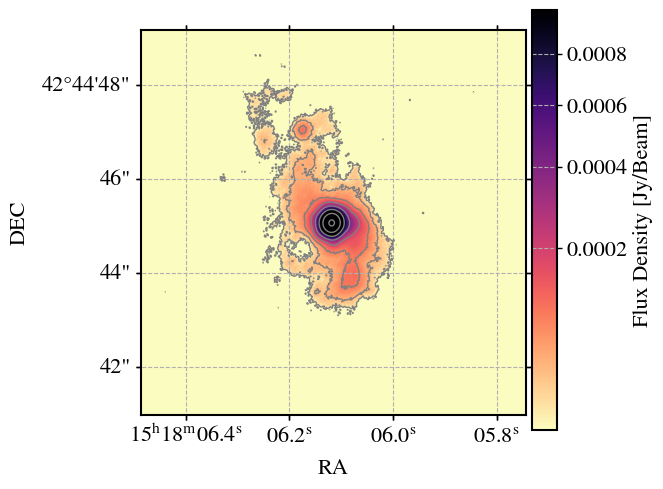

In [11]:
ax=eimshow(imagelist[idx],
        vmin_factor=3.0,vmax_factor=0.19, #level factor (max from peak, and min from std)
        neg_levels=np.asarray([-3]), # negative contours to draw -- which std level?
        CM='magma_r',
       )

Imported cmasher for density maps.If you would like to use, examples:CM = cmr.ember,CM = cmr.flamingo,CM = cmr.gothicCM = cmr.lavender


/home/sagauga/miniconda3/envs/numba/lib/python3.8/site-packages/numpy/core/function_base.py:424: RuntimeWarning: invalid value encountered in log10
  log_stop = _nx.log10(stop)
/home/sagauga/miniconda3/envs/numba/lib/python3.8/site-packages/numpy/core/function_base.py:423: RuntimeWarning: invalid value encountered in log10
  log_start = _nx.log10(start)


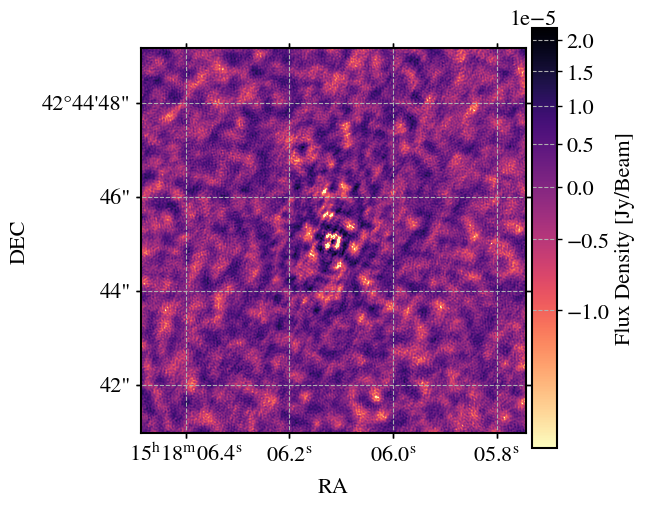

In [12]:
ax=eimshow(residuallist[idx],
        vmin_factor=-3.0,vmax_factor=0.99, #level factor (max from peak, and min from std)
        neg_levels=np.asarray([0]), # negative contours to draw -- which std level?
        CM='magma_r',add_contours=False # remove contours
       )

Want to zoom-in in the image? 

Imported cmasher for density maps.If you would like to use, examples:CM = cmr.ember,CM = cmr.flamingo,CM = cmr.gothicCM = cmr.lavender
  >> Center -->  [508 510   0   0]


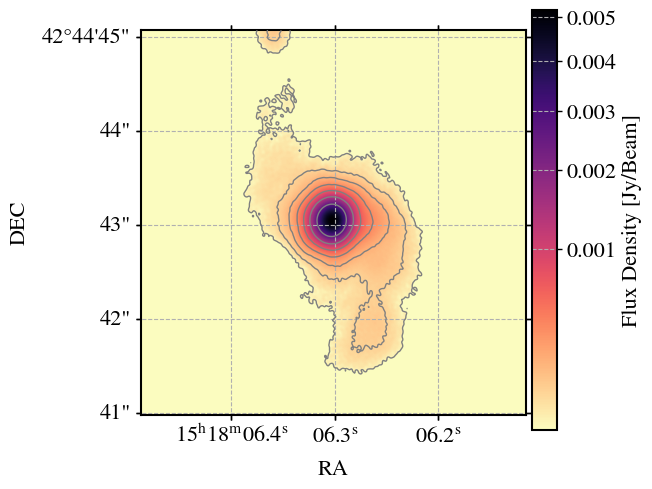

In [13]:
ax=eimshow(imagelist[idx],
        vmin_factor=3.0,vmax_factor=0.99, #level factor (max from peak, and min from std)
        neg_levels=np.asarray([-3]), # negative contours to draw -- which std level?
        CM='magma_r',crop=True,box_size=256
       )

If the zoom-in is not computing the rms value, you can provide it:

Imported cmasher for density maps.If you would like to use, examples:CM = cmr.ember,CM = cmr.flamingo,CM = cmr.gothicCM = cmr.lavender
  >> Center -->  [508 510   0   0]


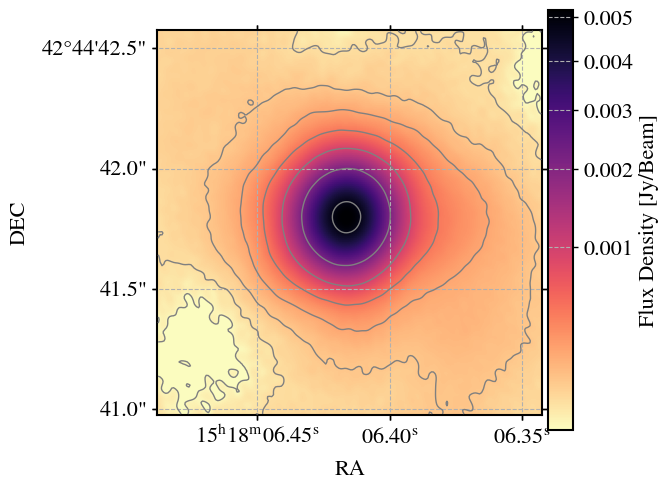

In [14]:
rms = mad_std(image_data)
ax=eimshow(imagelist[idx],rms=rms,
        vmin_factor=3.0,vmax_factor=0.99, #level factor (max from peak, and min from std)
        neg_levels=np.asarray([-3]), # negative contours to draw -- which std level?
        CM='magma_r',crop=True,box_size=100
       )

## 2.2 Basic Image Analysis

The default option of the following functions is to receive the imagefile as actually the filename, not the data it contains. Why? Because radio astronomy requires constantly reading information from the image header. 
You can provide as input a numpy array using the `data_2D` option, but you MUST provide the file name from which that data comes from. 

I am going to demonstrate the usage of the code for two extreme case, to demonstrate that it can do reliable measurements. 
The first case, is for a normal radio emission, with enough SNR, and the other case is an extreme situation, with poor SNR (e.g. eMERLIN image of VV 250 NW). 

In [15]:
imagename = imagelist[idx]

Mad    >   6.078438450334598e-06
std    >   0.00016405936113204341
median >   2.0195985825921525e-06
mean   >   1.7450768917242324e-05
0.012052829003158592
2.0177846774088155e-05
0.012960231910422455
Low Flux (extended) Jy                    >  0.0010467771584883325  >> ratio= 0.08692217681967591
Mid Flux (outer core + inner extended) Jy >  0.0028355966733267677  >> ratio= 0.23546199248762206
Inner Flux (core) Jy                      >  0.007284305251968518  >> ratio= 0.6048734097660947
Uncertain Flux (<5std)                    >  0.0008760147003345622  >> ratio= 0.07274242092660732
Total Flux Jy                             >  0.01204269378411818
Total area (in # ob beams)                >  74.05944964699898
Total inner area (in # ob beams)          >  3.977639237381377
Total mid area (in # ob beams)            >  21.023551546152316
Total low area (in # ob beams)            >  24.13497768037888
Total uncertain area (in # ob beams)      >  44.767564686104826
Inner Flux (core) fraction  

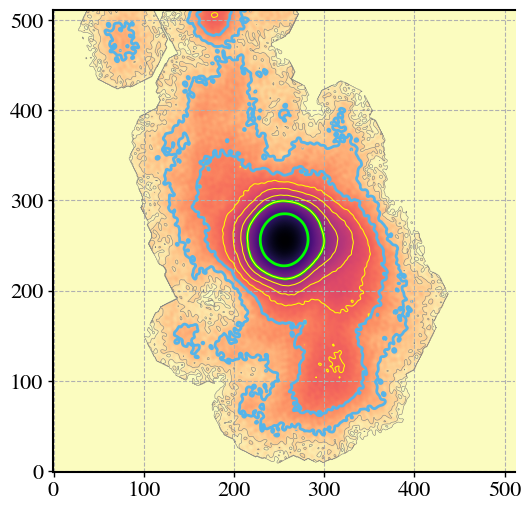

In [16]:
dict_results = plot_values_std(img=imagename, cell_size=None,crop=True,apply_mask=True,
                                 results=None,SAVE=True, ext='.jpg',show_figure=True)


In [17]:
dict_results

{'#imagename': 'clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..0.5-MFS-image.cutout_north.fits',
 'total_flux': 0.01204269378411818,
 'inner_flux': 0.007284305251968518,
 'low_flux': 0.0010467771584883325,
 'mid_flux': 0.0028355966733267677,
 'uncertain_flux': 0.0008760147003345622,
 'inner_flux_f': 0.6048734097660947,
 'low_flux_f': 0.08692217681967591,
 'mid_flux_f': 0.23546199248762206,
 'uncertain_flux_f': 0.07274242092660732,
 'number_of_beams': 74.05944964699898,
 'n_beams_inner': 3.977639237381377,
 'n_beams_mid': 21.023551546152316,
 'n_beams_low': 24.13497768037888,
 'n_beams_uncertain': 44.767564686104826}

5.999


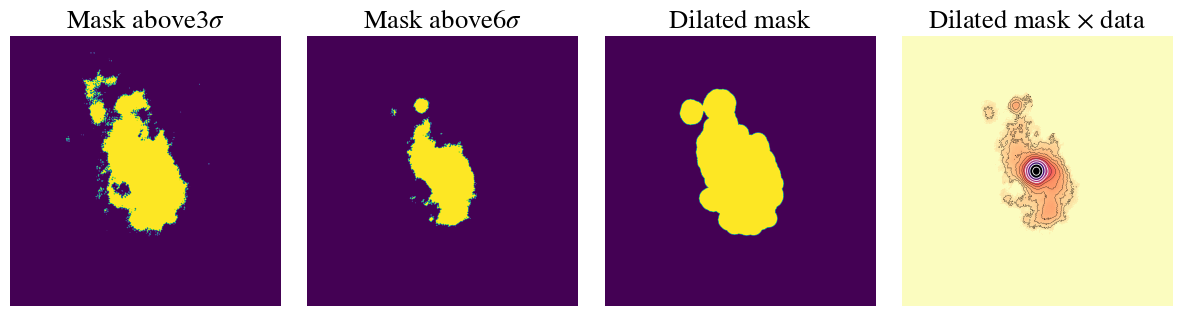

Inner Perimeter (%50): 200.4958310234366
Outer Perimeter (%90): 2374.747735258652
Outer Perimeter (%99): 1851.5401290882135
128 512 384
ctr=(  507.50   510.50)     I=    0.00     q=    0.93     PA=   89.99
ctr=(  507.50   510.00)     I=    0.00     q=    0.90     PA=   90.00
ctr=(  507.50   510.50)     I=    0.00     q=    0.93     PA=   90.00
ctr=(  507.50   510.00)     I=    0.00     q=    0.90     PA=   90.00
ctr=(  507.50   510.50)     I=    0.00     q=    0.94     PA=   90.00
ctr=(  507.50   510.00)     I=    0.00     q=    0.91     PA=   90.00
ctr=(  508.00   510.50)     I=    0.00     q=    0.91     PA=   90.00
ctr=(  507.50   510.00)     I=    0.00     q=    0.91     PA=   90.00
ctr=(  507.52   510.49)     I=    0.00     q=    0.94     PA=   89.99
ctr=(  507.53   510.48)     I=    0.00     q=    0.95     PA=   89.98
ctr=(  507.54   510.48)     I=    0.00     q=    0.95     PA=   89.94
ctr=(  507.96   510.46)     I=    0.00     q=    0.93     PA=   89.90
ctr=(  507.93   510.47) 

/run/media/sagauga/storage_wd_2/cloud/pcloud_void/PhD/GitHub/morphen/radio_morphen/../libs/fitEllipse2018.py:392: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(gal), origin='lower')
/run/media/sagauga/storage_wd_2/cloud/pcloud_void/PhD/GitHub/morphen/radio_morphen/../libs/fitEllipse2018.py:392: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(gal), origin='lower')


Initial PA and q =  113.02459781760624 0.5240000111901034
Median PA and q =  98.82701873388423 0.7039581251297407
Inner-Mean PA and q =  167.03799822643265 0.9333702230720349
Outer-Mean PA and q =  98.37312326110919 0.5966390393618601
15.138795132120961 31.935323316554435 87.23801389743035 133.45081424291462
R50/R50_100 >>  0.025990882100037315
R50 >>  31.935323316554435
R50_100 >>  198.0892044242205
Gaussianity >>  0.22553126565886522
Sum of fluxes =  0.011967925013747535


<Figure size 600x400 with 0 Axes>

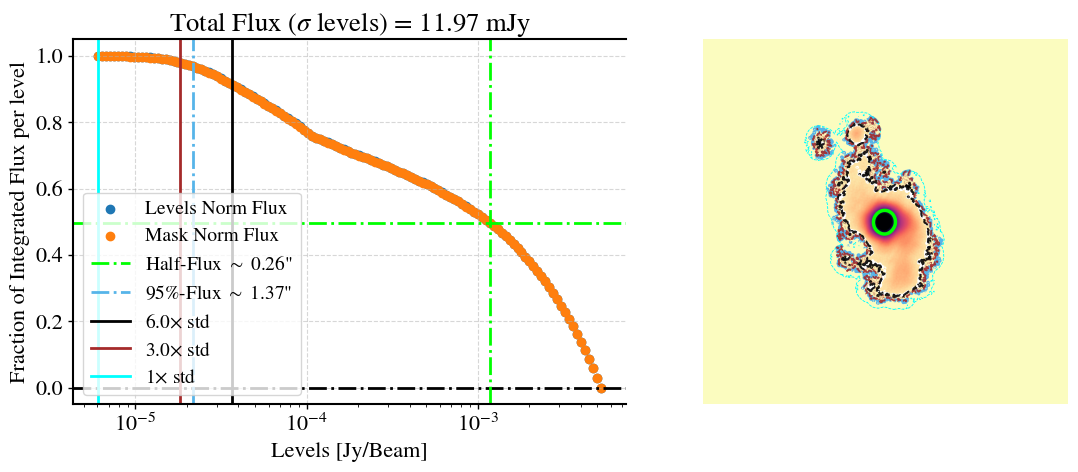

In [18]:
residualname = residuallist[idx]
cell_size = get_cell_size(imagelist[idx]) # for safety reasons
levels, fluxes, agrow, plt, \
    omask, mask, results_final = make_flux_vs_std(imagename,cell_size=cell_size,
                                                  residual=residualname,sigma_mask=6,dilation_size=None,
                                                  crop=False,iterations=2,box_size=100,
                                                 last_level=1,mask = None,
                                                 apply_mask=True, vmin_factor=3,
                                                 results=None,show_figure=True)

In [19]:
imview(''+imagelist[idx]+'')

Qt: Session management error: None of the authentication protocols specified are supported


(0) waiting for viewer process...
	...{'id': 'casaviewer:994e', 'priority': 0, 'types': array(['shutdown', 'image-view', 'interactive-clean'], dtype='<U18'), 'uri': '0.0.0.0:46271'}


E0712 00:57:19.292802337   27217 call.cc:896]                Invalid entry in accept encoding metadata: ' deflate'. Ignoring.
E0712 00:57:19.292840409   27217 call.cc:896]                Invalid entry in accept encoding metadata: ' gzip'. Ignoring.


Lets convert the pixel size to a linear size scale. We can use the function `pixsize_to_pc`. 

In [20]:
pixsize_to_pc??

In [28]:
pix_to_pc = pixsize_to_pc(z=z_d['VV250'],cell_size=get_cell_size(imagename))

D_a =  132.2397807654678 Mpc
Linear Distance =  5.128932392161905 pc


Then, we can check what is the size of the emission. 

In [29]:
np.sqrt((results_final['conv_AT']/np.pi))*pix_to_pc

1119.156908771112

In [30]:
results_final['C95radii']*pix_to_pc

879.8055646651038

In [31]:
# Possition angle of the ~nuclear region
results_final['PAmi']

167.03799822643265

In [32]:
# Possition angle of the outer/diffuse region
results_final['PAmo']

98.37312326110919

In [33]:
# large scale axis ration (e.g. outer region)
results_final['qmo']

0.5966390393618601

In [34]:
#elongation along the semi-major axis
results_final['C95radii']*0.006/results_final['qmo']

1.7250405714002683

In [35]:
#elongation along the semi-minor axis
results_final['qmo'] * results_final['C95radii']*pix_to_pc

524.9263469270064

# Some Image statistics

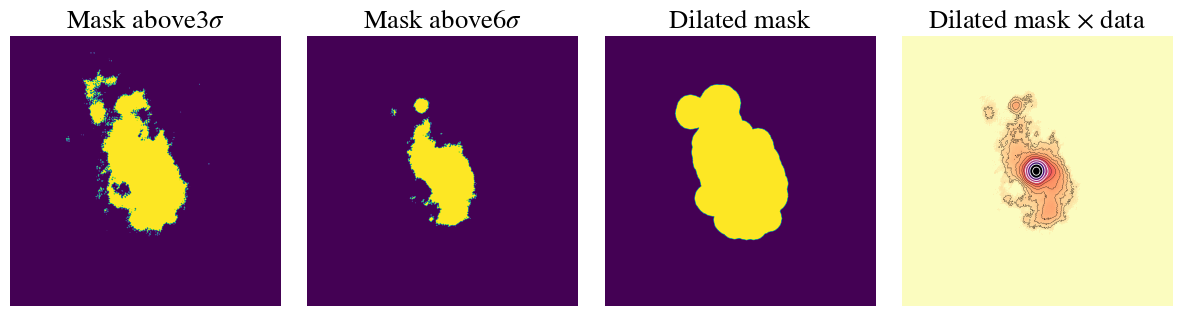

In [29]:
img_stats = get_image_statistics(imagename=imagelist[idx],cell_size=cell_size,
                         mask_component=None,mask=None,
                         residual_name=None,region='', dic_data=None,
                         sigma_mask=6,apply_mask=True,
                         fracX=0.1, fracY=0.1)

In [30]:
img_stats

{'#imagename': 'clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..0.5-MFS-image.cutout_north.fits',
 'max_im': 0.005217486992478371,
 'min_im': -1.8316313799005002e-05,
 'rms_im': 0.00016498485782294567,
 'rms_box': 4.31028254775232e-06,
 'sigma_im': 0.00016405943936169854,
 'sigma_box': 4.051087346897247e-06,
 'flux_im': 0.01296023191042245,
 'flux_box': 1.1065725115403121e-05,
 'q_sq': 144811.20173622153,
 'q_flux': 1171.2049391487449,
 'snr': 3006.8172484842817,
 'snr_im': 78.55406903056999,
 'DR_SNR_E': 1115.0917920982693,
 'DR_pk_rmsbox': 1210.474472305564,
 'DR_pk_rmsim': 31.62403544983227,
 'bmajor': 0.3014487836136904,
 'bminor': 0.264547539093812,
 'positionangle': 174.546024018627}

Providing a residual image (the residual map created during cleaning), you can get an error estimates for the total fluxes. 


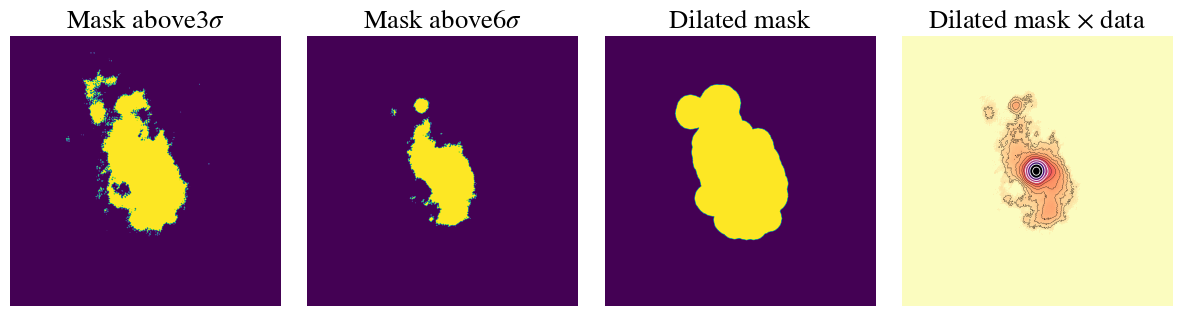

Estimate #1 of flux error (based on sum of residual map): 
Flux =  12.197449454200854 +/- 0.377518213280038 mJy
Fractional error flux =  0.030950586407227875
-----------------------------------------------------------------
Estimate #2 of flux error (based on rms of residual x area): 
Flux =  12.197449454200854 +/- 0.6519338572281038 mJy
Fractional error flux =  0.053448375389952944


In [31]:
img_stats = get_image_statistics(imagename=imagelist[idx],cell_size=cell_size,
                         mask_component=None,mask=None,
                         residual_name=residuallist[idx],region='', dic_data=None,
                         sigma_mask=6,apply_mask=True,
                         fracX=0.1, fracY=0.1)

In [32]:
img_stats

{'#imagename': 'clean_image_VV705_combined_w_0.5_4096_0.008arcsec_10000.briggs.-multiscale..0.5-MFS-image.cutout_north.fits',
 'max_im': 0.005217486992478371,
 'min_im': -1.8316313799005002e-05,
 'rms_im': 0.00016498485782294567,
 'rms_box': 4.31028254775232e-06,
 'sigma_im': 0.00016405943936169854,
 'sigma_box': 4.051087346897247e-06,
 'flux_im': 0.01296023191042245,
 'flux_box': 1.1065725115403121e-05,
 'q_sq': 144811.20173622153,
 'q_flux': 1171.2049391487449,
 'snr': 3006.8172484842817,
 'snr_im': 78.55406903056999,
 'DR_SNR_E': 1115.0917920982693,
 'DR_pk_rmsbox': 1210.474472305564,
 'DR_pk_rmsim': 31.62403544983227,
 'bmajor': 0.3014487836136904,
 'bminor': 0.264547539093812,
 'positionangle': 174.546024018627,
 'max_residual': 2.2250995243666694e-05,
 'min_residual': -2.1886989998165518e-05,
 'flux_residual': 0.00038476611391529927,
 'flux_error_res': 0.00037751821328003797,
 'flux_error_res_2': 0.0006519338572281039,
 'mad_std_residual': 4.614185519454027e-06,
 'rms_residual': 

All possible measurements are merged into a single function, called `measures`. For that, you must provide the redshift of the source. 

In this case, we are using as an example, VV705, which is at redshift ~ 0.04

In [35]:
z_d['VV705']

0.04019

     >> CALC: Performing mask dilation.


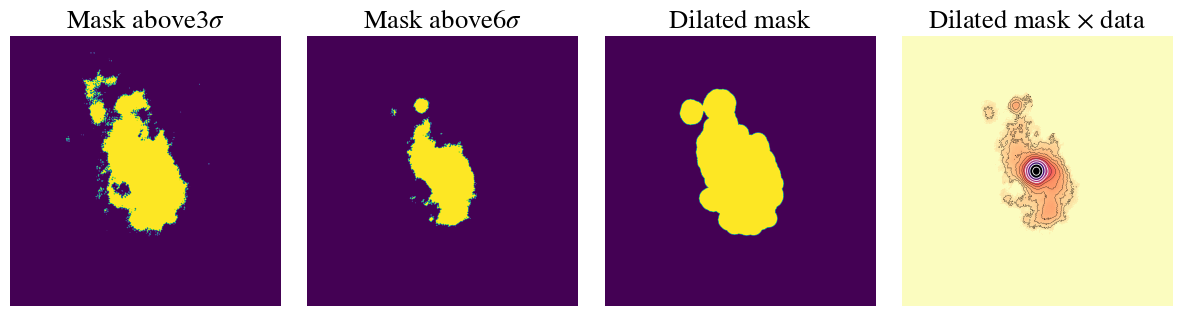

0.011973574330450392
2.0168655629633257e-05
0.012960231910422455
Mad    >   6.078438450334598e-06
std    >   0.00016405936113204341
median >   2.0195985825921525e-06
mean   >   1.7450768917242324e-05
Low Flux (extended) Jy                    >  0.0010462457828250033  >> ratio= 0.08744630683947628
Mid Flux (outer core + inner extended) Jy >  0.0028355966733267677  >> ratio= 0.2370021087198067
Inner Flux (core) Jy                      >  0.007284305251968518  >> ratio= 0.6088297822870086
Uncertain Flux (<5std)                    >  0.0007982887631143296  >> ratio= 0.06672180215370842
Total Flux Jy                             >  0.01196443647123462
Total area (in # ob beams)                >  72.5756258930257
Total inner area (in # ob beams)          >  3.977639237381377
Total mid area (in # ob beams)            >  21.023551546152316
Total low area (in # ob beams)            >  24.11868749119445
Total uncertain area (in # ob beams)      >  39.93221157470834
Inner Flux (core) fraction     

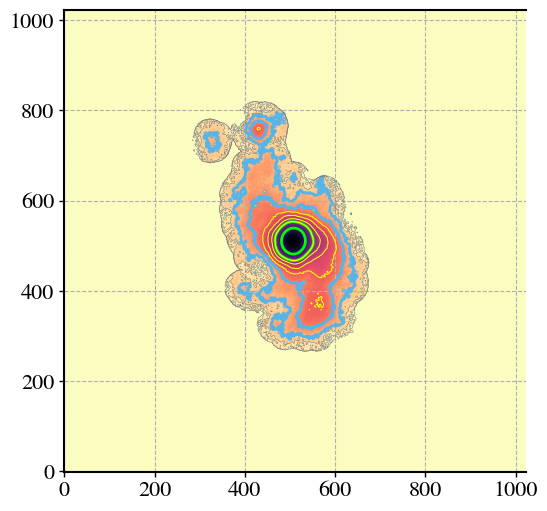

5.999
Inner Perimeter (%50): 195.91819506416505
Outer Perimeter (%90): 2104.246606315475
Outer Perimeter (%99): 1851.5401290882135
128 512 384
ctr=(  507.50   510.50)     I=    0.00     q=    0.93     PA=   89.99
ctr=(  507.50   510.00)     I=    0.00     q=    0.90     PA=   90.00
ctr=(  508.00   510.50)     I=    0.00     q=    0.90     PA=   90.00
ctr=(  507.50   510.50)     I=    0.00     q=    0.93     PA=   90.00
ctr=(  508.00   510.50)     I=    0.00     q=    0.91     PA=   90.00
ctr=(  507.50   510.50)     I=    0.00     q=    0.94     PA=   90.00
ctr=(  507.50   510.50)     I=    0.00     q=    0.88     PA=   90.00
ctr=(  508.00   510.50)     I=    0.00     q=    0.91     PA=   90.00
ctr=(  507.50   510.00)     I=    0.00     q=    0.91     PA=   90.00
ctr=(  507.50   510.50)     I=    0.00     q=    0.89     PA=   90.00
ctr=(  507.52   510.49)     I=    0.00     q=    0.89     PA=   90.00
ctr=(  507.54   510.02)     I=    0.00     q=    0.92     PA=   89.99
ctr=(  507.55   5

/run/media/sagauga/storage_wd_2/cloud/pcloud_void/PhD/GitHub/morphen/radio_morphen/../libs/fitEllipse2018.py:392: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(gal), origin='lower')
/run/media/sagauga/storage_wd_2/cloud/pcloud_void/PhD/GitHub/morphen/radio_morphen/../libs/fitEllipse2018.py:392: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(gal), origin='lower')


Initial PA and q =  113.02459781760624 0.5240000111901034
Median PA and q =  95.7068448567367 0.8057950697481799
Inner-Mean PA and q =  167.73394309483788 0.9313298678675839
Outer-Mean PA and q =  95.51680686675115 0.6018911392123186
14.787795366729423 31.11238280628643 81.93190581043481 125.46592011910319
R50/R50_100 >>  0.030584945890493622
R50 >>  31.11238280628643
R50_100 >>  177.9014203526266
Gaussianity >>  0.24045136741069092
Sum of fluxes =  0.011740140861681764


<Figure size 600x400 with 0 Axes>

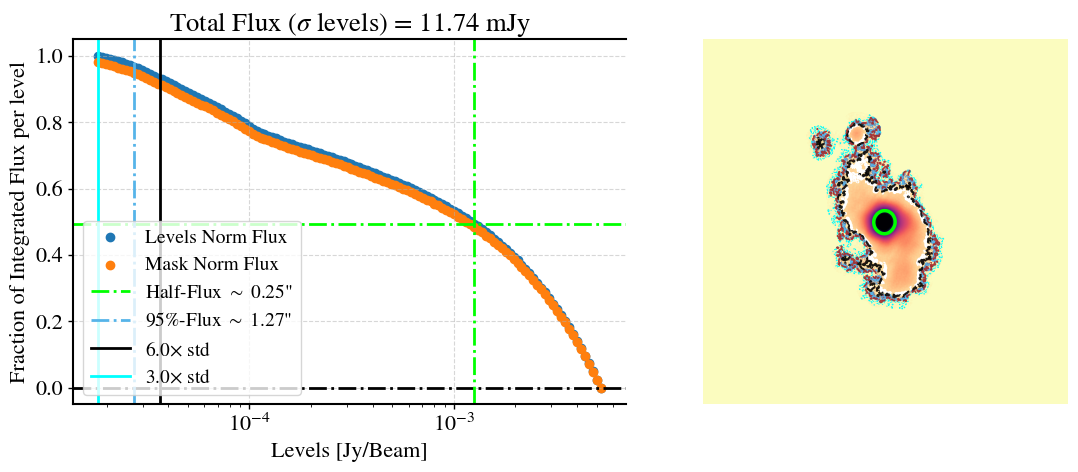

1


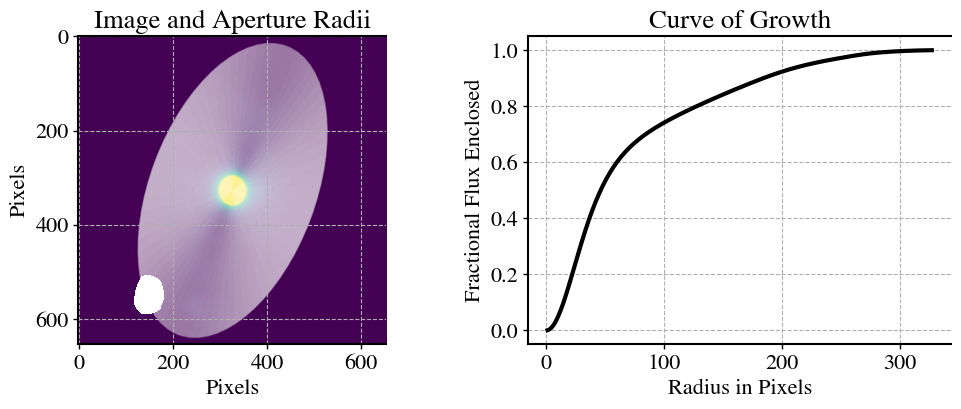

Rlast     >>  327
Rp        >>  197.74374874974995
Rtotal    >>  395.4874974994999
1


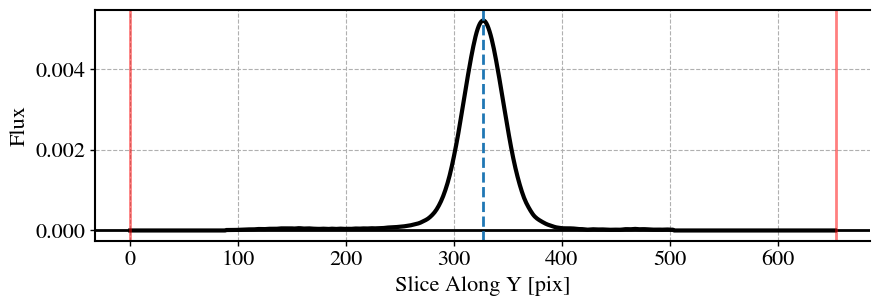

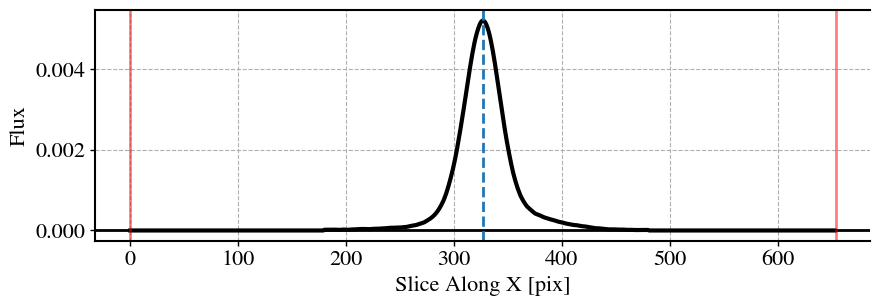

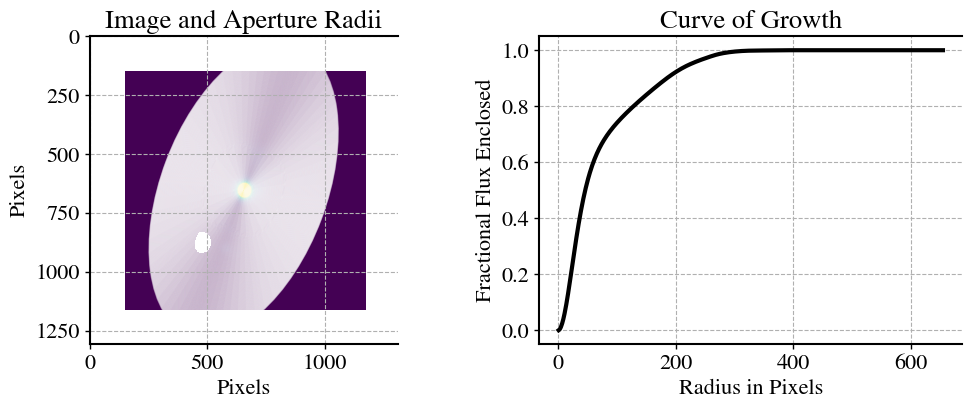

/run/media/sagauga/storage_wd_2/cloud/pcloud_void/PhD/GitHub/morphen/radio_morphen/../libs/libs.py:1579: RuntimeWarning: invalid value encountered in true_divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


eta = 0.2
epsilon = 2
r_half_light (old vs new) = 38.72
r_total_flux (old vs new) = 155.42
R50 =  38.7245449089818
Rp= 77.71074214842969


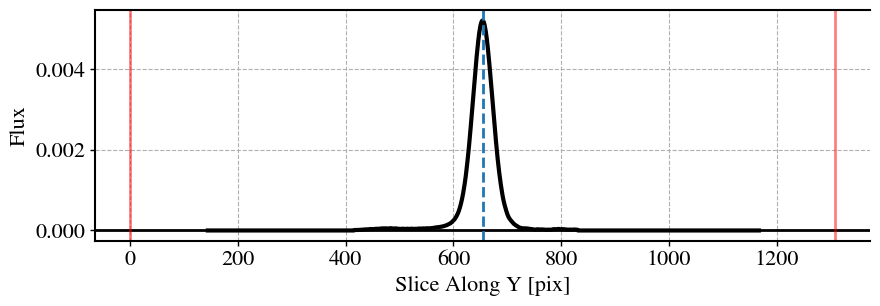

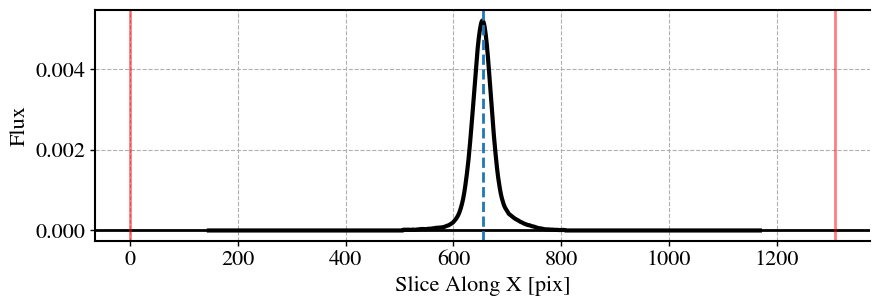

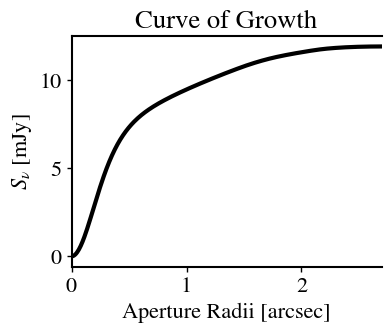

<Figure size 600x400 with 0 Axes>

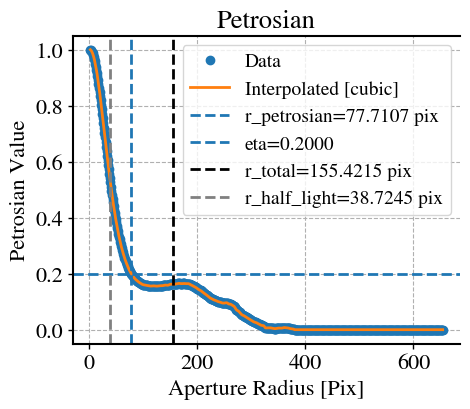

/run/media/sagauga/storage_wd_2/cloud/pcloud_void/PhD/GitHub/morphen/radio_morphen/../libs/libs.py:1579: RuntimeWarning: invalid value encountered in true_divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


D_a =  168.48244070796565 Mpc
Linear Distance =  6.534607382555773 pc
--==>> Computing asymetries...
--==>> Computing image statistics...
Estimate #1 of flux error (based on sum of residual map): 
Flux =  11.973574330450392 +/- 0.284709487321417 mJy
Fractional error flux =  0.023778153412165565
-----------------------------------------------------------------
Estimate #2 of flux error (based on rms of residual x area): 
Flux =  11.973574330450392 +/- 0.5516138908945334 mJy
Fractional error flux =  0.046069275194768354
D_a =  168.48244070796565 Mpc
Linear Distance =  816.8259228194797 pc


In [40]:
image_measures, _ = measures(imagename=imagelist[idx], 
                          residualname=residuallist[idx], z=0.04, mask_component=None, sigma_mask=6,
                          last_level=3.0, vmin_factor=1.0, plot_catalog=True,data_2D=None,
                          npixels=128, fwhm=81, kernel_size=21, dilation_size=None,
                          main_feature_index=0, results_final={}, iterations=2,
                          fracX=0.10, fracY=0.10, deblend=False, bkg_sub=False,
                          bkg_to_sub=None, rms=None,do_petro=True,
                          apply_mask=True, do_PLOT=True, SAVE=True, show_figure=True,
                          mask=None,do_measurements='all',compute_A=True,
                          add_save_name='')

In [41]:
image_measures

{'total_flux': 0.01196443647123462,
 'inner_flux': 0.007284305251968518,
 'low_flux': 0.0010462457828250033,
 'mid_flux': 0.0028355966733267677,
 'uncertain_flux': 0.0007982887631143296,
 'inner_flux_f': 0.6088297822870086,
 'low_flux_f': 0.08744630683947628,
 'mid_flux_f': 0.2370021087198067,
 'uncertain_flux_f': 0.06672180215370842,
 'number_of_beams': 72.5756258930257,
 'n_beams_inner': 3.977639237381377,
 'n_beams_mid': 21.023551546152316,
 'n_beams_low': 24.11868749119445,
 'n_beams_uncertain': 39.93221157470834,
 'total_flux_nomask': 0.012960231910422455,
 'total_flux_mask': 0.011973574330450392,
 'total_flux_levels': 0.011740140861681764,
 'x0': 507.5020884275579,
 'y0': 509.50242227774544,
 'x0m': 507.58891722472225,
 'y0m': 509.8633954042365,
 'PA': -69.40192751666174,
 'q': 0.5379456791640882,
 'PAm': 95.7068448567367,
 'qm': 0.8057950697481799,
 'PAmi': 167.73394309483788,
 'qmi': 0.9313298678675839,
 'PAmo': 95.51680686675115,
 'qmo': 0.6018911392123186,
 'x0m_i': 507.60611

Note that multiple quantities are calculated (many of them are for testing purposes). The ones that may be interesting are: 
- C50radii > Half-light source radii
- C95radii > approximated full-size of the source

In [69]:
# proper estimate for the total integrated flux  (good estimate, even if image contains deconvolution errors). 
# However, sometimes may be underestimated. 
image_measures['total_flux_mask']

0.011973574330450392

In [70]:
# upper total integrated flux  (may be overstimated if image contains deconvolution errors)
image_measures['total_flux_nomask']

0.012960231910422455

In [71]:
#total integrated flux  using the Petrosian method.
image_measures['total_flux_rp']

0.01012271924545071

In [72]:
#total integrated flux (only uses positive pixel values, ignores negative intensities)
image_measures['total_flux_levels']

0.011740140861681764

In [42]:
image_measures['C50radii']

31.11238280628643

In [74]:
# convert to parsecs
image_measures['C50radii'] * image_measures['pix_to_pc']

203.3072063748606

In [43]:
image_measures['C95radii']

158.3444076208914

In [48]:
image_measures['r_total_flux']

155.42148429685938

In [50]:
image_measures['C1'], image_measures['C1p']

(0.7435496248777004, 0.5955832344445389)

In [51]:
image_measures['C2'], image_measures['C2p']

(0.6055925021783695, 0.45761597918501407)

In [56]:
image_measures['A0'], image_measures['A1']

(0.4188314507108665, 0.41883145071086636)

In [36]:
# def compute_flux_density_errors(residual_map, mask,BA):
#     # Compute the residual flux density using the given mask
#     masked_residual = residual_map * mask
#     residual_flux_density = np.sum(masked_residual)
    
#     # Compute the root-mean-square of the residual map within the area
#     residual_squared = np.square(residual_map)
#     residual_rms = np.sqrt(np.mean(residual_squared))
    
#     # Compute the weighted flux error
#     area = np.sum(mask)
#     flux_error = 1000*residual_rms * residual_flux_density * area/BA
    
#     return flux_error
def compute_flux_density_errors(residual_map, mask,BA):
    # Compute the residual flux density using the given mask
    masked_residual = residual_map * mask
    residual_flux_density = np.sum(masked_residual)
    
    # Compute the root-mean-square of the residual map within the area
    residual_squared = np.square(residual_map)
    residual_rms = np.sqrt(np.mean(residual_squared))
    
    # Compute the weighted flux error
    area = np.sum(mask)
    flux_error = 1000*residual_rms /BA
    
    return flux_error

In [37]:
compute_flux_density_errors(ctn(residuallist[idx]),mask,beam_area2(residuallist[idx]))

3.2746517268294915e-06

In [38]:
np.square??

Imported cmasher for density maps.If you would like to use, examples:CM = cmr.ember,CM = cmr.flamingo,CM = cmr.gothicCM = cmr.lavender


<Axes: xlabel='x pix', ylabel='y pix'>

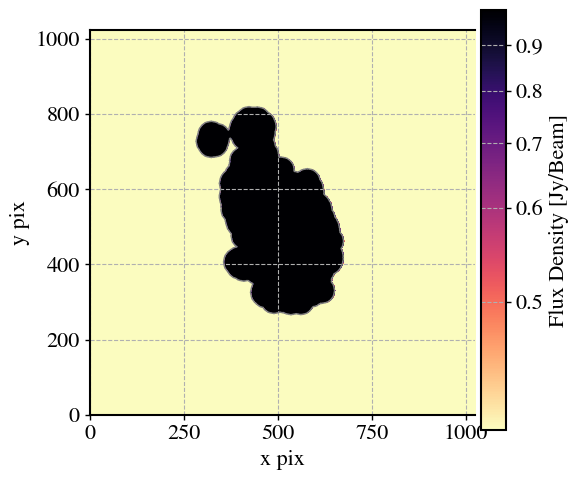

In [40]:
eimshow(mask)